In [1]:
import os
import zipfile
import shutil
import gdown

In [2]:
url = 'https://drive.google.com/uc?id=1_F3Vr9YQ7p-RLmdXjxIEkBNZG0HbCkyB'
output = 'dataset.zip'
gdown.download(url, output, quiet=False)

!unzip -q dataset.zip
!unzip -q train.zip
!unzip -q test.zip

Downloading...
From: https://drive.google.com/uc?id=1_F3Vr9YQ7p-RLmdXjxIEkBNZG0HbCkyB
To: /content/dataset.zip
100%|██████████| 405M/405M [00:09<00:00, 44.5MB/s]


In [3]:
dataset_home = './'
subdirs = ['train_set/', 'val_set/']

for subdir in subdirs:
    labeldirs = ['cidades/', 'florestas/', 'desertos/']
    
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        os.makedirs(newdir, exist_ok=True)

In [4]:
from sklearn.model_selection import train_test_split

where_is_data = 'train'
all_data = os.listdir(where_is_data)
train_data, val_data = train_test_split(all_data, test_size=0.2)

In [5]:
for dst_data, dst_set_name in zip([train_data, val_data], ['train_set/', 'val_set/']):
    for f_name in dst_data:
        if f_name.startswith('cidade'):
            src = 'train/' + f_name
            dst = dst_set_name + 'cidades/' + f_name
            os.rename(src, dst)

        elif f_name.startswith('deserto'):
            src = 'train/' + f_name
            dst = dst_set_name + 'desertos/' + f_name
            os.rename(src, dst)
        
        elif f_name.startswith('floresta'):
            src = 'train/' + f_name
            dst = dst_set_name + 'florestas/' + f_name
            os.rename(src, dst)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'val_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 302 images belonging to 3 classes.
Found 76 images belonging to 3 classes.


In [7]:
from tensorflow.keras.applications import VGG19

model_vgg19 = VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling=None,
    classifier_activation="softmax",
)

for layer in model_vgg19.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 3s 0us/step


In [8]:
from tensorflow.keras.applications import Xception

model_xception = Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling=None,
    classifier_activation="softmax",
)

for layer in model_xception.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 3s 0us/step


In [9]:
from tensorflow.keras.applications import ResNet50

model_res_net = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling=None,
    classifier_activation="softmax",
)

for layer in model_res_net.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [10]:
from tensorflow.keras.applications import InceptionV3

model_inception = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling=None,
    classifier_activation="softmax",
)

for layer in model_inception.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 3s 0us/step


In [11]:

from tensorflow.keras.applications import DenseNet169

model_dense_net = DenseNet169(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling=None,
    classifier_activation="softmax",
)

for layer in model_dense_net.layers:
    layer.trainable = False

51877672/51877672 [==============================] - 2s 0us/step


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [13]:
transferred_model_1 = Sequential([
    model_vgg19,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

transferred_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
transferred_model_2 = Sequential([
    model_xception,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

transferred_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
transferred_model_3 = Sequential([
    model_res_net,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

transferred_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
transferred_model_4 = Sequential([
    model_inception,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

transferred_model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
transferred_model_5 = Sequential([
    model_dense_net,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

transferred_model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = transferred_model_1.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

10/10 [==============================] - 23s 1s/step - loss: 2.2807 - accuracy: 0.5497 - val_loss: 1.0070 - val_accuracy: 0.6316


In [19]:
history = transferred_model_2.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

10/10 [==============================] - 16s 1s/step - loss: 4.9006 - accuracy: 0.7152 - val_loss: 2.0321 - val_accuracy: 0.8684


In [20]:
history = transferred_model_3.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

10/10 [==============================] - 16s 1s/step - loss: 5.4167 - accuracy: 0.3808 - val_loss: 2.3445 - val_accuracy: 0.3553


In [21]:
history = transferred_model_4.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

10/10 [==============================] - 19s 1s/step - loss: 15.0032 - accuracy: 0.5430 - val_loss: 3.9677 - val_accuracy: 0.7763


In [22]:
history = transferred_model_5.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

10/10 [==============================] - ETA: 0s - loss: 3.3459 - accuracy: 0.7616

10/10 [==============================] - 28s 2s/step - loss: 3.3459 - accuracy: 0.7616 - val_loss: 1.5962 - val_accuracy: 0.8816


In [23]:
loss, accuracy = transferred_model_1.evaluate(validation_generator)
print("VGG19 Model Accuracy: ", accuracy)

3/3 [==============================] - 2s 442ms/step - loss: 1.0070 - accuracy: 0.6316
VGG19 Model Accuracy:  0.6315789222717285


In [24]:
loss, accuracy = transferred_model_2.evaluate(validation_generator)
print("Xception Model Accuracy: ", accuracy)

3/3 [==============================] - 2s 456ms/step - loss: 2.0321 - accuracy: 0.8684
Xception Model Accuracy:  0.8684210777282715


In [25]:
loss, accuracy = transferred_model_3.evaluate(validation_generator)
print("ResNet Model Accuracy: ", accuracy)

3/3 [==============================] - 2s 477ms/step - loss: 2.3445 - accuracy: 0.3553
ResNet Model Accuracy:  0.3552631437778473


In [26]:
loss, accuracy = transferred_model_4.evaluate(validation_generator)
print("Inception Model Accuracy: ", accuracy)

3/3 [==============================] - 2s 439ms/step - loss: 3.9676 - accuracy: 0.7763
Inception Model Accuracy:  0.7763158082962036


In [27]:
loss, accuracy = transferred_model_5.evaluate(validation_generator)
print("DenseNet Model Accuracy: ", accuracy)

3/3 [==============================] - 2s 446ms/step - loss: 1.5962 - accuracy: 0.8816
DenseNet Model Accuracy:  0.8815789222717285


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array, img

def display_prediction(img_path, model):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)

    plt.imshow(img)
    plt.axis('off')

    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        accuracy = prediction[0][predicted_class] * 100
        plt.title("Prediction: Cidade {:.2f}%".format(accuracy))
    elif predicted_class == 1:
        accuracy = prediction[0][predicted_class] * 100
        plt.title("Prediction: Deserto {:.2f}%".format(accuracy))
    else:
        accuracy = prediction[0][predicted_class] * 100
        plt.title("Prediction: Floresta {:.2f}%".format(accuracy))


    plt.show()

In [29]:
all_files = os.listdir('test')

for i, f_name in enumerate(all_files, start=1):
    new_name = f"{i}.jpg"
    os.rename(os.path.join('test', f_name), os.path.join('test', new_name))

In [30]:
import random

rand_num = random.randint(1, len(all_files))
img_path = 'test/' + str(rand_num) + '.jpg'

1/1 [==============================] - 1s 720ms/step


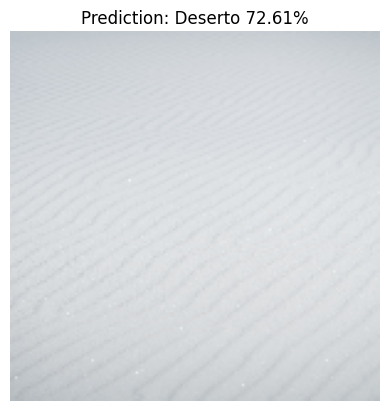

In [31]:
display_prediction(img_path, transferred_model_1)

1/1 [==============================] - 1s 1s/step


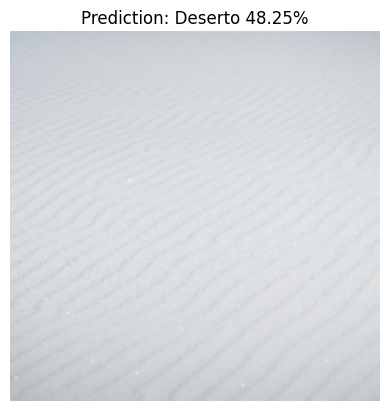

In [32]:
display_prediction(img_path, transferred_model_2)

1/1 [==============================] - 1s 1s/step


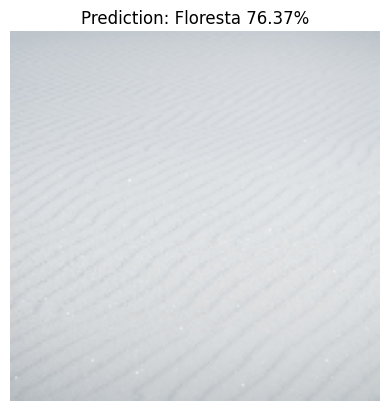

In [33]:
display_prediction(img_path, transferred_model_3)

1/1 [==============================] - 2s 2s/step


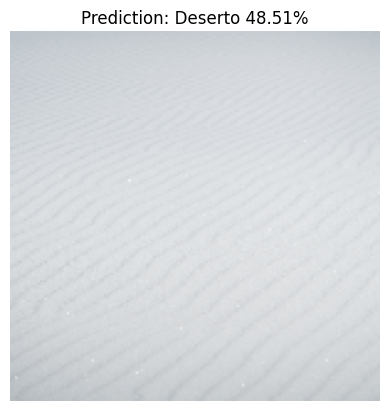

In [34]:
display_prediction(img_path, transferred_model_4)

1/1 [==============================] - 4s 4s/step


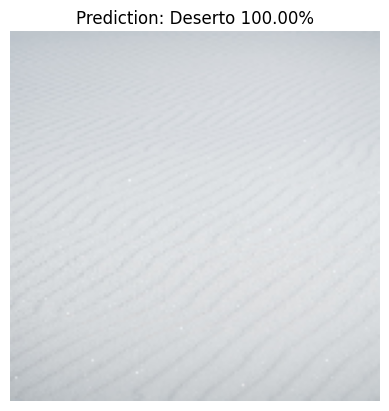

In [35]:
display_prediction(img_path, transferred_model_5)